In [37]:
import cv2
from matplotlib import pyplot as plt
import os

## Methods for image processing

In [180]:
def load_image(file_path):
    
    # check file extension
    filename, file_extension = os.path.splitext(file_path)
    if file_extension.lower() == '.png':
        image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
        # check alpha channel
        if image.shape[2] == 4:
            # make mask of where the transparent bits are
            trans_mask = image[:,:,3] == 0
            # replace areas of transparency with white and not transparent
            image[trans_mask] = [255, 255, 255, 255]
            # new image without alpha channel...
            image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    else:
        image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return image


def plot_image(image, gray=False, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.gca()

    if not gray:
        ax.imshow(image[...,::-1])
    else:
        ax.imshow(image[...,::-1], 'gray')
    
    if ax is None:
        plt.show()


def squarify_image(image):
    if len(image.shape) == 2:
        height, width = image.shape
    else:
        height, width, color_depth= image.shape

    if width > height:
        start = round((width - height) / 2)
        end = round(start + height)
        cropped_image = image[:, start:end]
    else:
        start = round((height - width) / 2)
        end = round(start + width)
        cropped_image = image[start:end, :]
    return cropped_image

## Load Image

ax is None


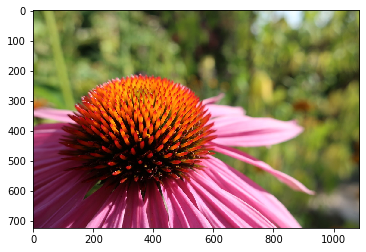

In [126]:
orig_image = load_image('images/flower.jpeg')
plot_image(orig_image)

## Transform to grayscale

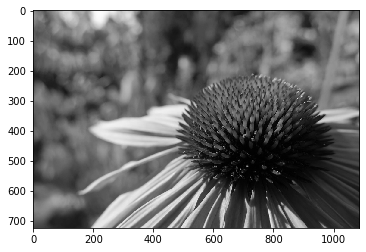

In [87]:
gray_image = cv2.cvtColor(orig_image, cv2.COLOR_RGB2GRAY)
plot_image(gray_image, gray=True)

## Make it square

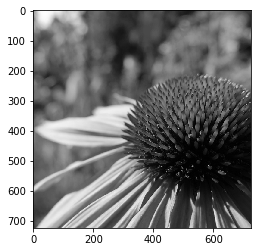

In [88]:
crop_gray_image = squarify_image(gray_image)
plt.imshow(crop_gray_image[...,::-1], 'gray')

## Resize it to Nonogram shape

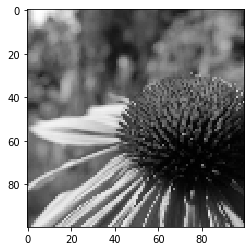

In [94]:
cells = 100
resized_image = cv2.resize(crop_gray_image, (cells, cells))
plt.imshow(resized_image[...,::-1], 'gray')

## Binarize image

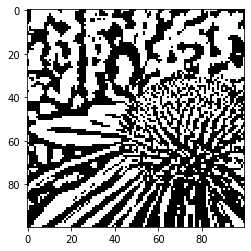

In [96]:
bin_image = cv2.adaptiveThreshold(resized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(bin_image[...,::-1], 'gray')

## Full version

Loading images/stocking.png...
Loading images/city.jpeg...
Loading images/flower2.jpeg...
Loading images/flower3.jpeg...
Loading images/bells.png...
Loading images/schatz2.jpeg...
Loading images/candle.jpeg...
Loading images/schatz.jpeg...
Loading images/flower.jpeg...
Loading images/santa_hat.png...
Loading images/santa_hat.jpg...
Loading images/fire.jpeg...
Loading images/candy_cane.png...


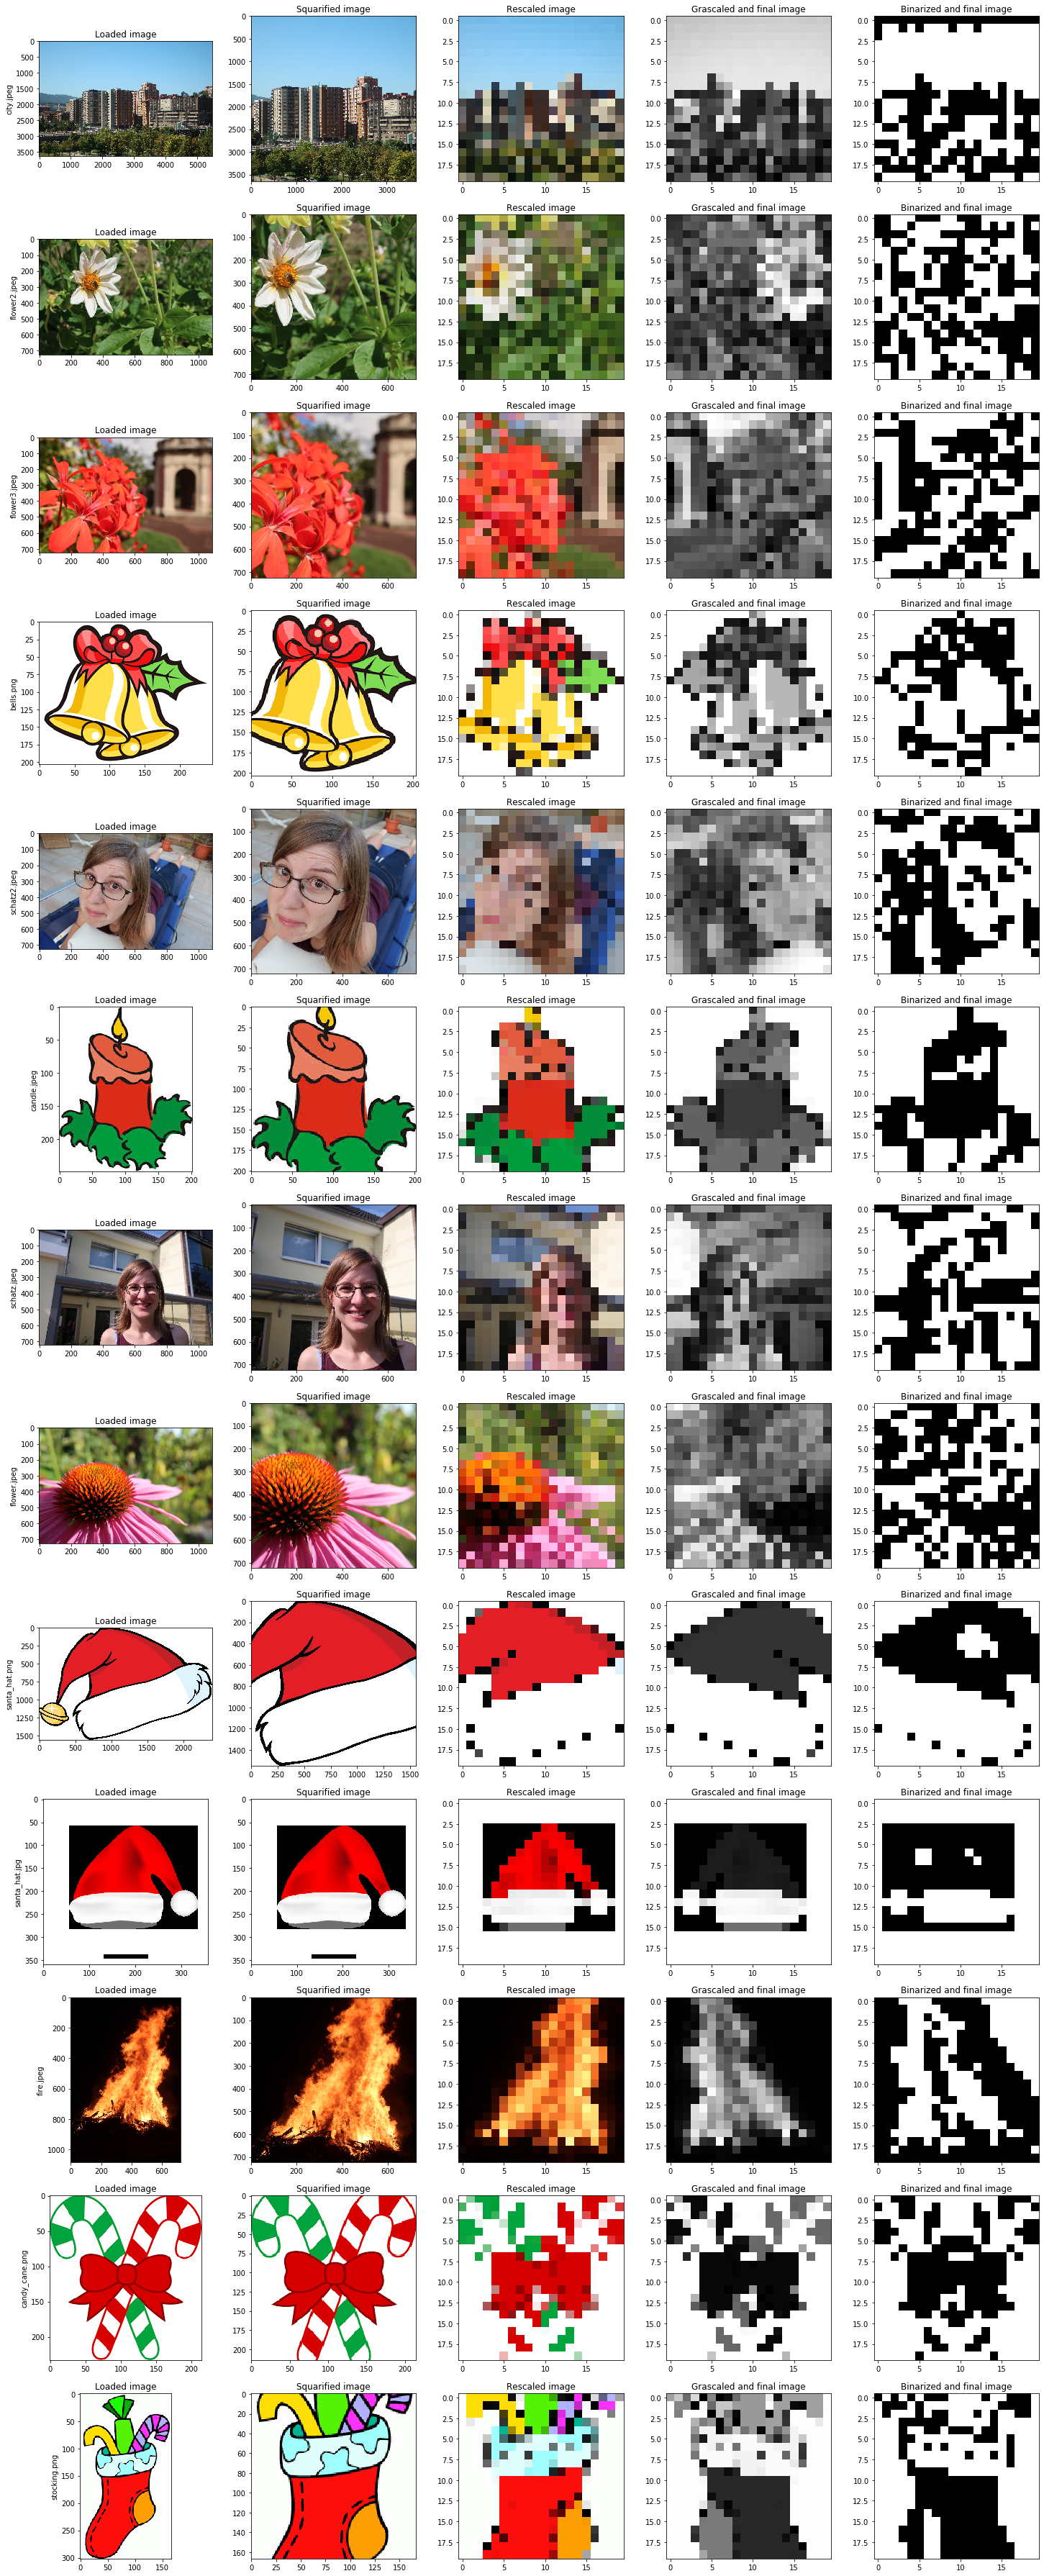

In [182]:
cells = 20
image_files = [f for f in os.listdir('images') if f not in ['.ipynb_checkpoints', '.DS_Store']]

# img_path = 'images/santa_hat.png'
# img_path = 'images/flower.jpeg'
n_images = len(image_files)
fig, ax2d = plt.subplots(n_images, 5, figsize=(25, n_images*5))

for img_file, ax1d in zip(image_files, ax2d):

    # load image
    ax = ax1d[0]
    ax.set_title('Loaded image')
    ax.set_ylabel(f'{img_file}')
    print(f'Loading {img_path}...')
    img_path = f'images/{img_file}'
    image = load_image(img_path)
    plot_image(image, ax=ax)

    # squarify
    ax = ax1d[1]
    ax.set_title('Squarified image')
    image = squarify_image(image)
    plot_image(image, ax=ax)
    
    # resize
    ax = ax1d[2]
    ax.set_title('Rescaled image')
    image = cv2.resize(image, (cells, cells))
    plot_image(image, ax=ax)

    # convert to black and white
    ax = ax1d[3]
    ax.set_title('Grascaled and final image')
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plot_image(image, gray=True, ax=ax)

    # binarize
    ax = ax1d[4]
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    ax.set_title('Binarized and final image')
    plot_image(image, gray=True, ax=ax)

In [189]:
def generate_nonogram(img_path):
    # load image
    image = load_image(img_path)
    # squarify
    image = squarify_image(image)
    # resize
    image = cv2.resize(image, (cells, cells))
    # convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # binarize
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    return image

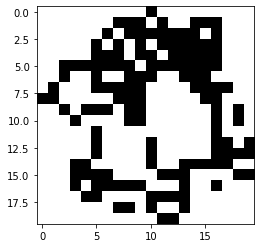

In [187]:
plot_image(generate_nonogram('images/bells.png'), gray=True)

## Thresholding experiments

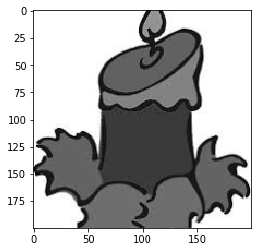

In [224]:
img_path = 'images/candle.jpeg'
cells = 200

# load image
image = load_image(img_path)
# squarify
image = squarify_image(image)
# resize
image = cv2.resize(image, (cells, cells))
# convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plot_image(image, gray=True)

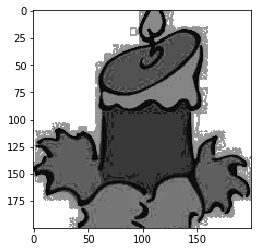

In [234]:
import numpy as np
equ = cv2.equalizeHist(image)
plot_image(equ, gray=True)

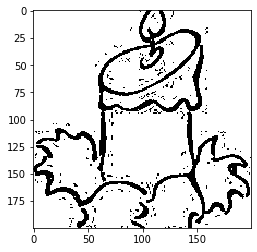

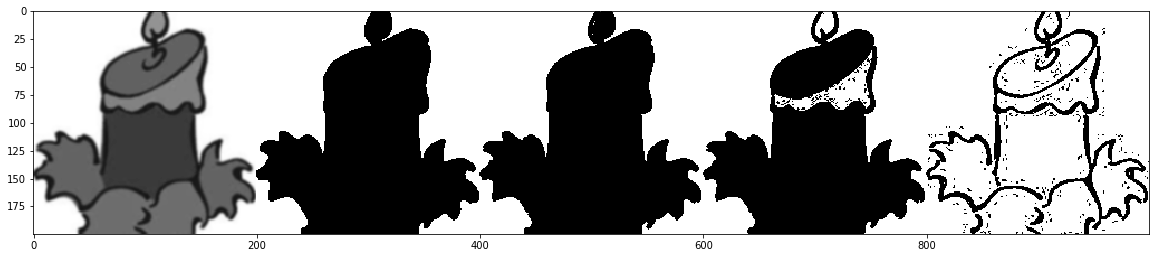

In [238]:
# binarize
bin_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plot_image(bin_image, gray=True)

ret,th1 = cv2.threshold(image, 127,255,cv2.THRESH_BINARY)

ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fs = 5
blur = cv2.GaussianBlur(image,(fs,fs),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(image,(fs,fs),0)

images = [bin_image, th1, th2, th3, blur]
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plot_image(np.hstack(images), gray=True, ax=ax)

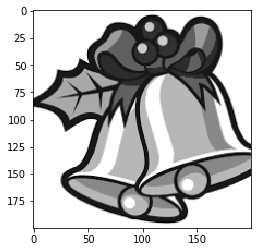

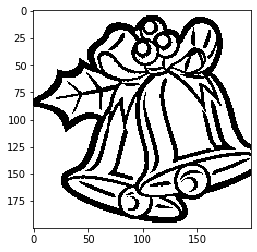

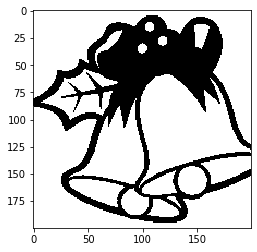

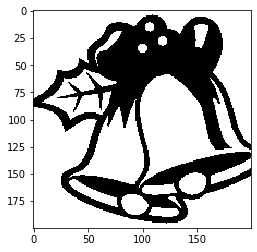

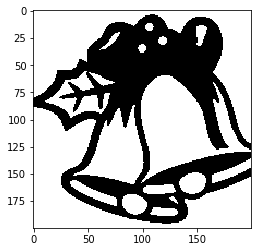

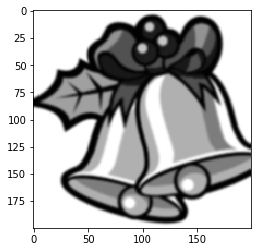

In [239]:
img_path = 'images/bells.png'
cells = 200

# load image
image = load_image(img_path)
# squarify
image = squarify_image(image)
# resize
image = cv2.resize(image, (cells, cells))
# convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plot_image(image, gray=True)

# binarize
bin_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plot_image(bin_image, gray=True)

ret,th1 = cv2.threshold(image, 127,255,cv2.THRESH_BINARY)
plot_image(th1, gray=True)

ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_image(th2, gray=True)

fs = 5
blur = cv2.GaussianBlur(image,(fs,fs),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_image(th3, gray=True)

blur = cv2.GaussianBlur(image,(fs,fs),0)
plot_image(blur, gray=True)

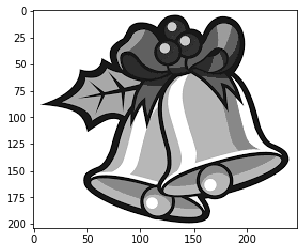

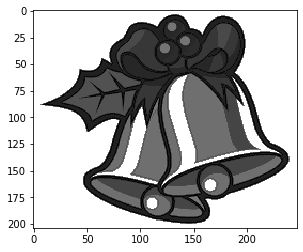

In [257]:
img_path = 'images/bells.png'

# load image
image = load_image(img_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plot_image(image, gray=True)

equ = cv2.equalizeHist(image)
plot_image(equ, gray=True)